In [1]:
import numpy as np
import pandas as pd
import sys
import glob
import os,time,datetime

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

oldwarnings = np.seterr(divide = 'ignore', invalid = 'ignore')

import matplotlib.dates as mdates


In [2]:
data = cdc.CoronaData(download_data = True)

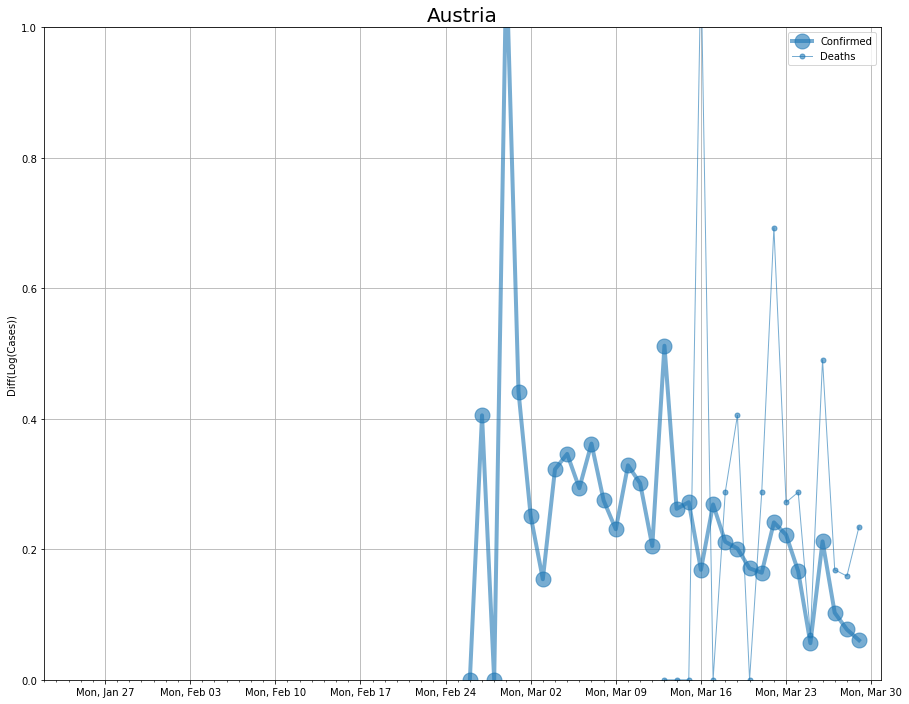

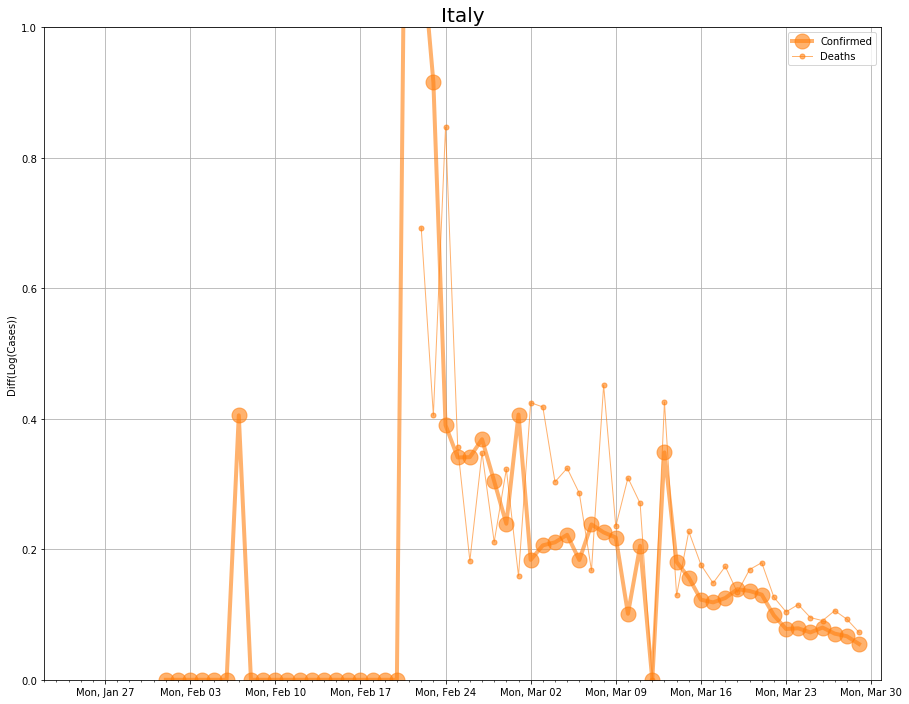

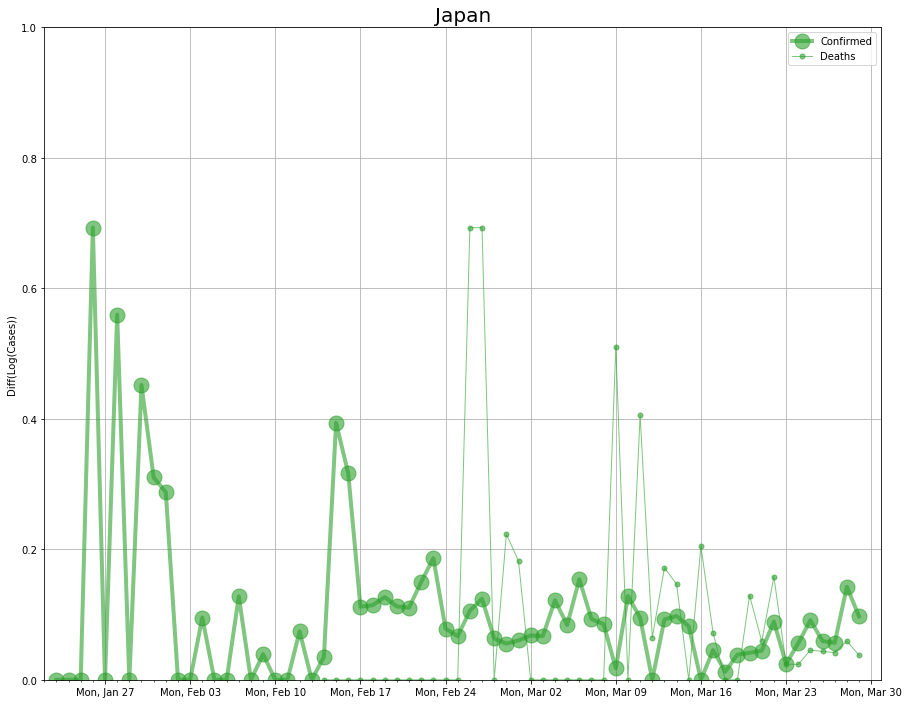

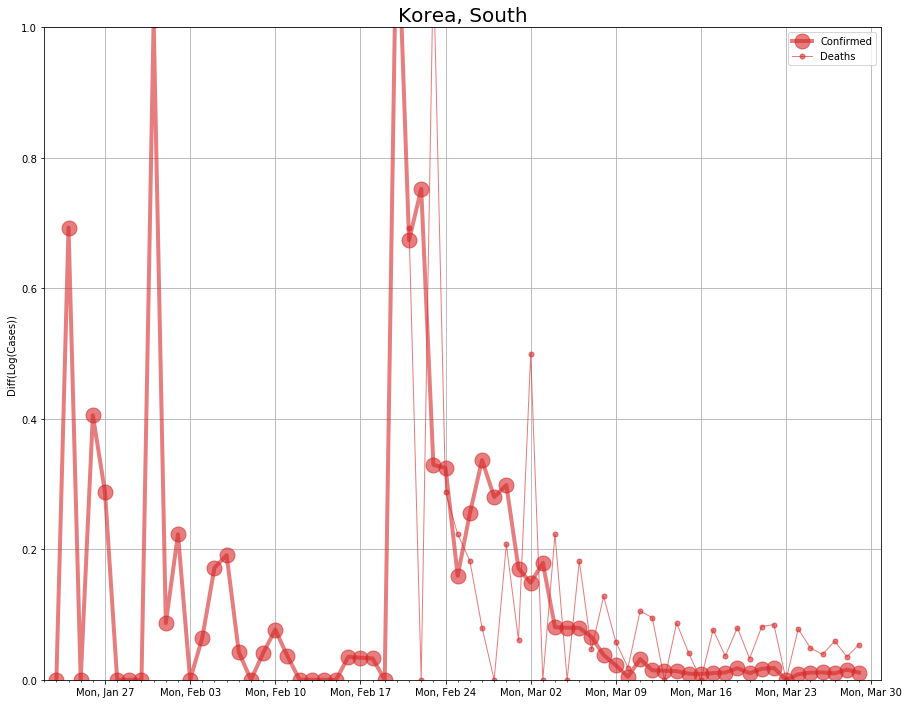

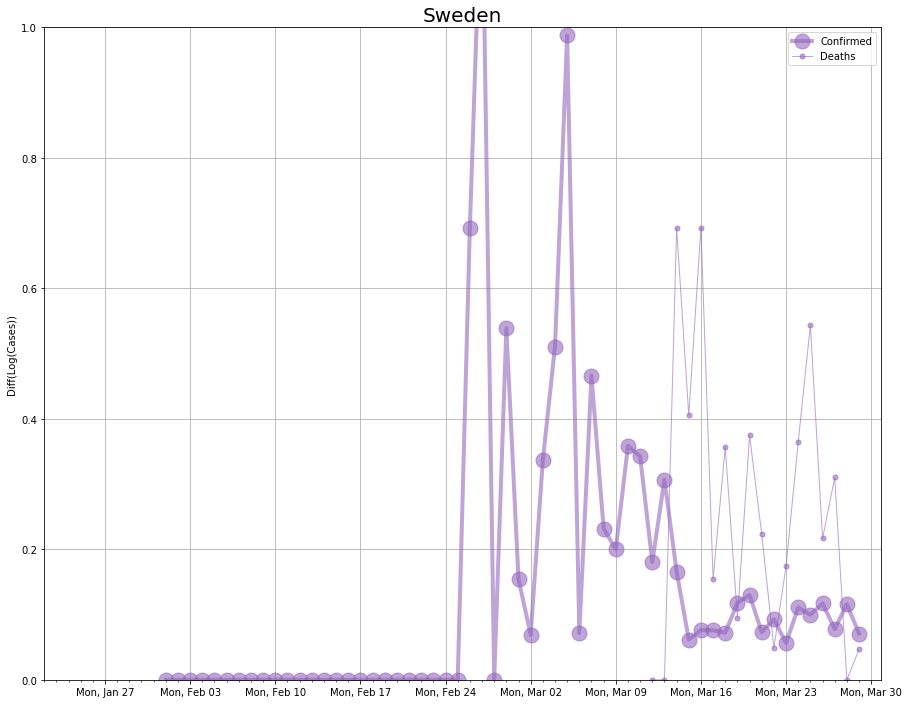

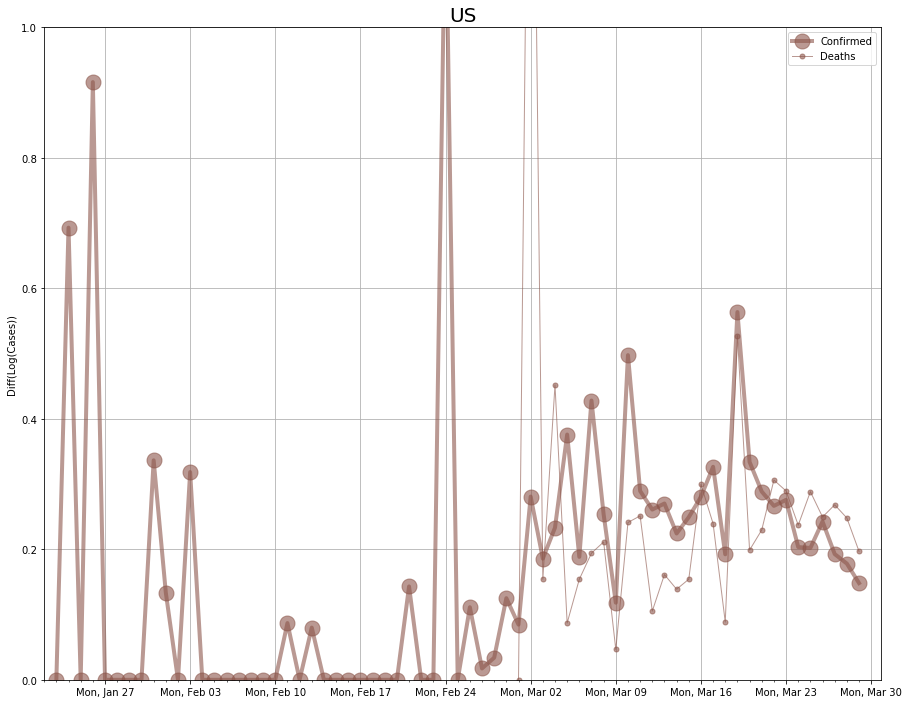

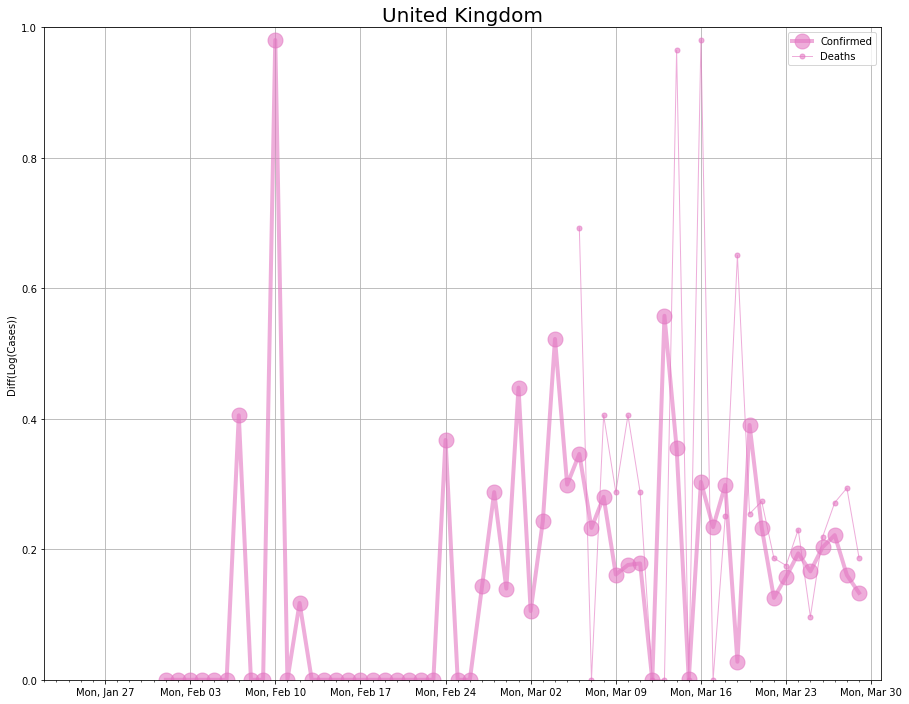

In [4]:
specialcountries = ['Austria', 'Italy', 'Sweden', 'Japan', 'US', 'United Kingdom', 'Korea, South']
colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
i                = 0

days     = mdates.DayLocator()
weeks    = mdates.WeekdayLocator(byweekday = mdates.MO)
date_fmt = mdates.DateFormatter('%a, %b %d')

for country, countrydata in data:
    if country in specialcountries:
        dates          = [datetime.datetime.strptime(a,'%m/%d/%y') for a in np.array(countrydata['Date'])[1:]]
        dlog_confirmed = np.diff(np.log(countrydata['Confirmed']))
        dlog_deaths    = np.diff(np.log(countrydata['Deaths']))
        
        fig,ax = plt.subplots()
        ax.xaxis.set_major_locator(weeks)
        ax.xaxis.set_major_formatter(date_fmt)
        ax.xaxis.set_minor_locator(days)
        ax.format_xdata = mdates.DateFormatter('%y %m %d')
        
        ax.plot(dates,dlog_confirmed,marker = 'o',c = colornames[i%len(colornames)], label = 'Confirmed', lw = 4, markersize = 15, alpha = .6)
        ax.plot(dates,dlog_deaths,   marker = '.',c = colornames[i%len(colornames)], label = 'Deaths',    lw = 1, markersize = 10, alpha = .6)
        
        plt.title(country,fontsize = 20)
        plt.ylim([0,1])
        plt.xlim([datetime.datetime.strptime('1/22/20','%m/%d/%y'), datetime.datetime.today()])
        plt.ylabel(r'Diff(Log(Cases))')
        plt.legend()
        plt.grid()
        plt.show()
        
        i+=1
